<a href="https://colab.research.google.com/github/mafecamargo/Data_Science_Matplotlib01/blob/main/disney_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
disney = pd.read_csv('disney_movies.csv')

In [3]:
disney

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


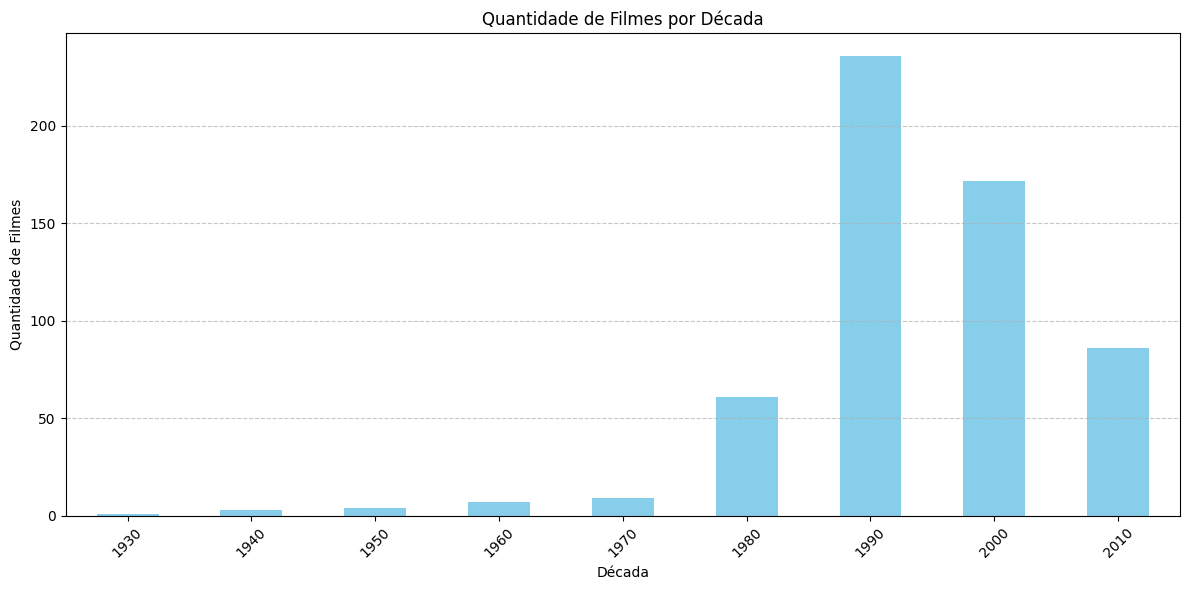

In [11]:
disney['release_date'] = pd.to_datetime(disney['release_date'], errors='coerce')

disney['decade'] = disney['release_date'].dt.year // 10 * 10

disney = disney.dropna(subset=['decade'])

decade_counts = disney['decade'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Filmes por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

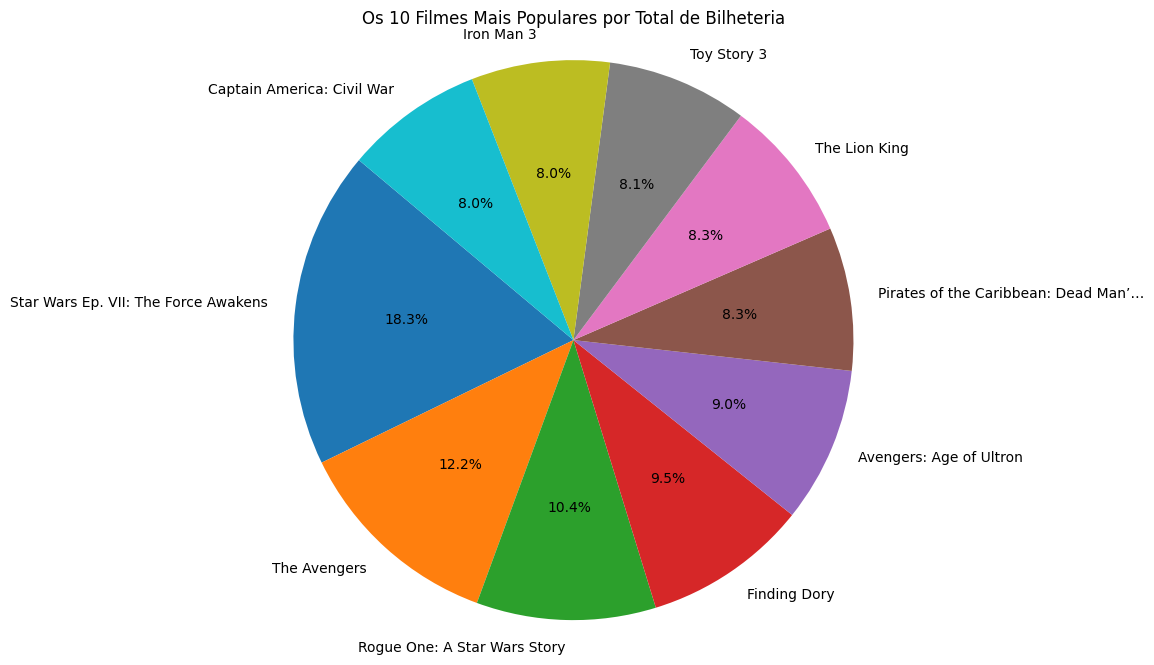

In [13]:
top_movies = disney.nlargest(10, 'total_gross')[['movie_title', 'total_gross']]

plt.figure(figsize=(12, 8))
plt.pie(top_movies['total_gross'], labels=top_movies['movie_title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Os 10 Filmes Mais Populares por Total de Bilheteria')
plt.show()

<Figure size 1200x600 with 0 Axes>

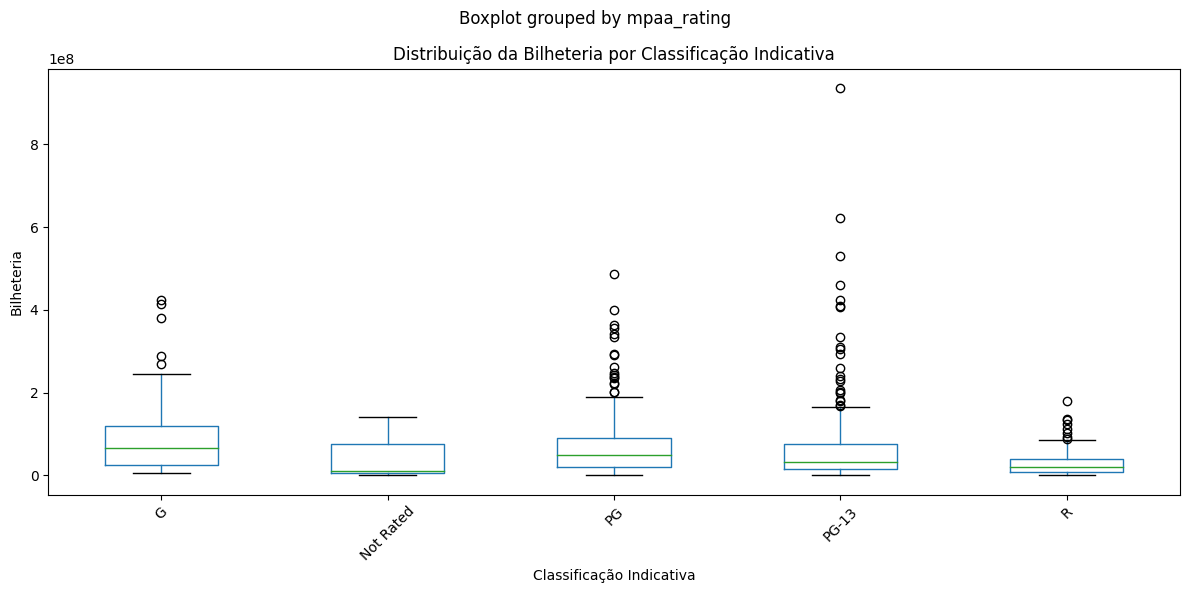

In [16]:
disney_cleaned = disney.dropna(subset=['mpaa_rating', 'total_gross'])

plt.figure(figsize=(12, 6))
disney_cleaned.boxplot(column='total_gross', by='mpaa_rating', figsize=(12, 6), grid=False)
plt.title('Distribuição da Bilheteria por Classificação Indicativa')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Bilheteria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

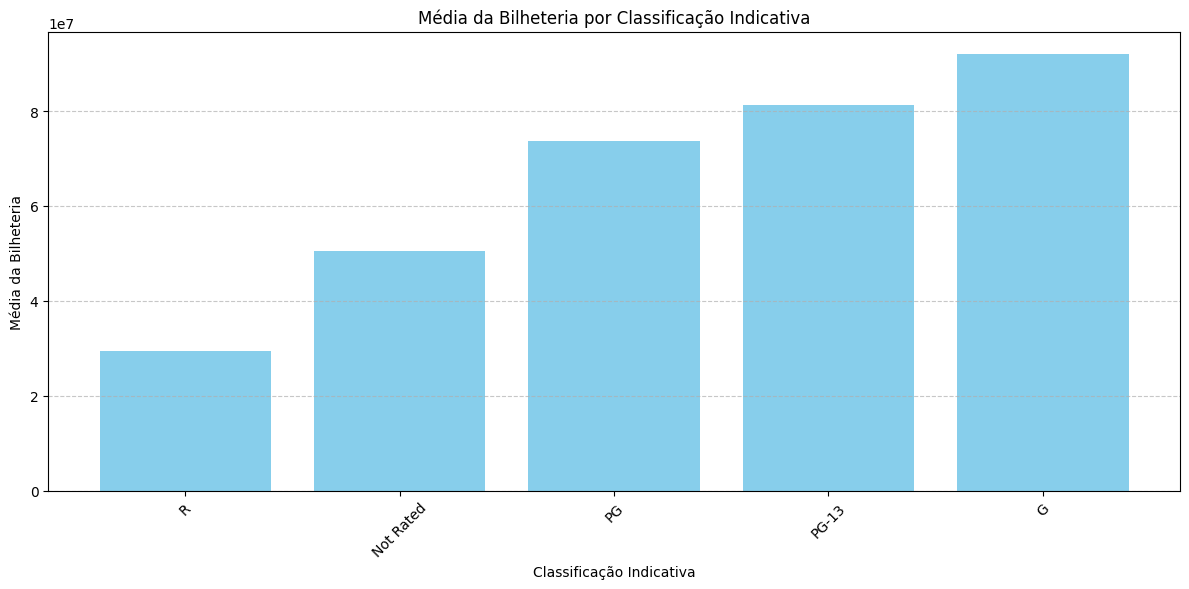

In [17]:
disney_cleaned = disney.dropna(subset=['mpaa_rating', 'total_gross'])

avg_gross_by_rating = disney_cleaned.groupby('mpaa_rating')['total_gross'].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(avg_gross_by_rating.index, avg_gross_by_rating.values, color='skyblue')
plt.title('Média da Bilheteria por Classificação Indicativa')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Média da Bilheteria')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

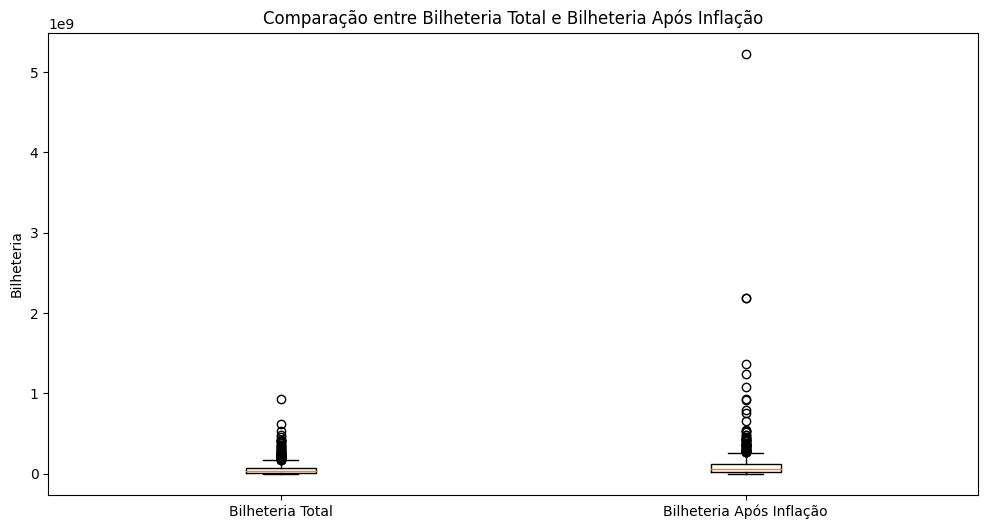

In [19]:
disney_cleaned = disney.dropna(subset=['inflation_adjusted_gross', 'total_gross'])

plt.figure(figsize=(12, 6))
plt.boxplot([disney_cleaned['total_gross'], disney_cleaned['inflation_adjusted_gross']], labels=['Bilheteria Total', 'Bilheteria Após Inflação'])
plt.title('Comparação entre Bilheteria Total e Bilheteria Após Inflação')
plt.ylabel('Bilheteria')
plt.show()

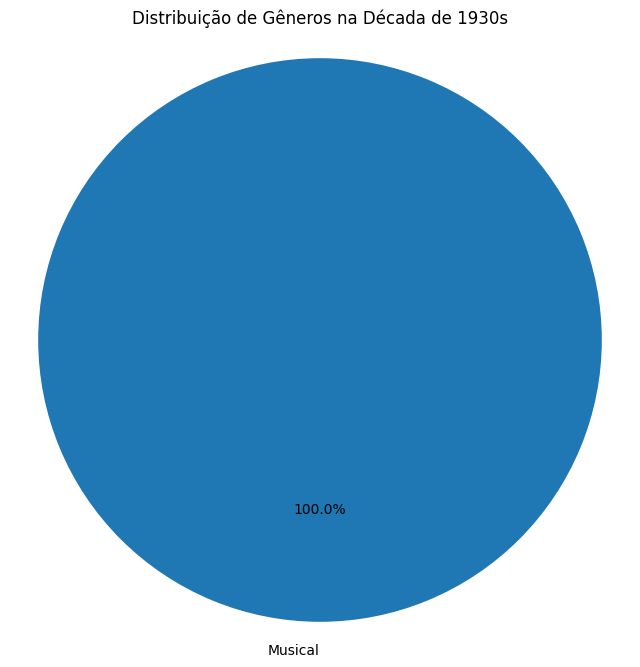

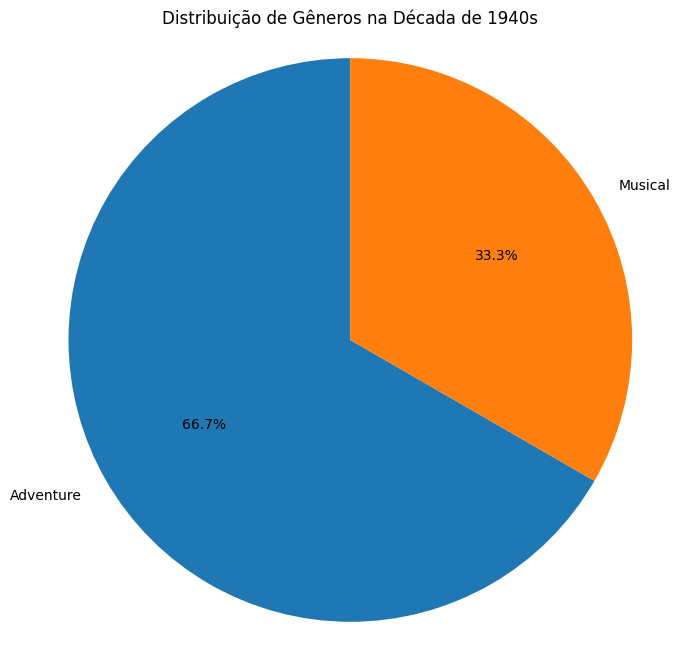

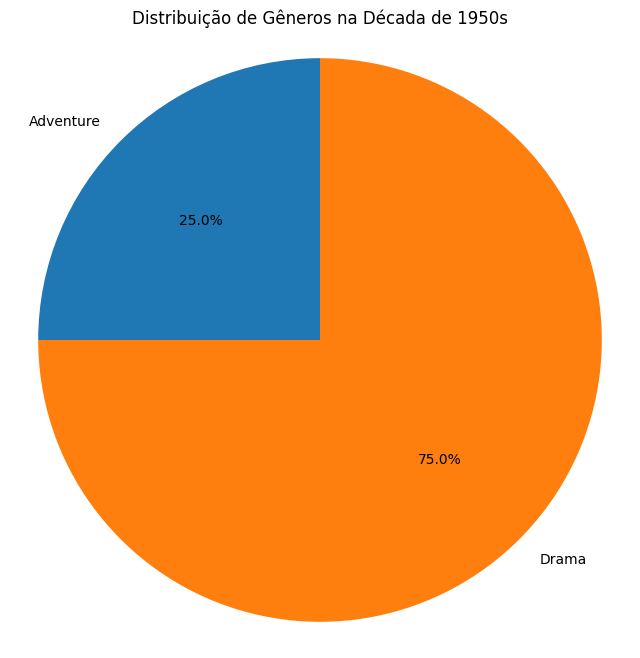

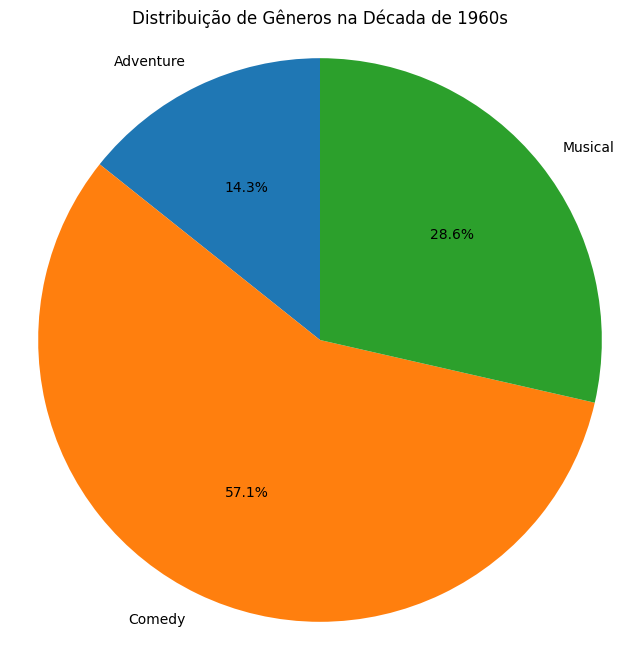

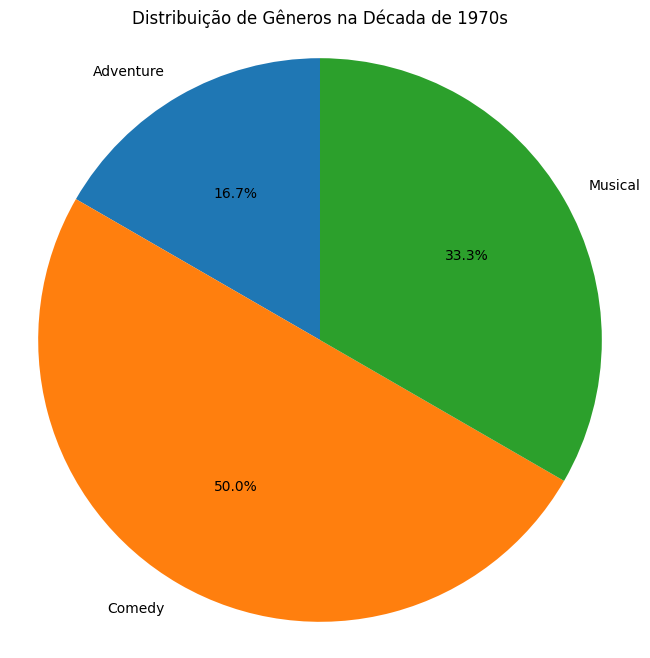

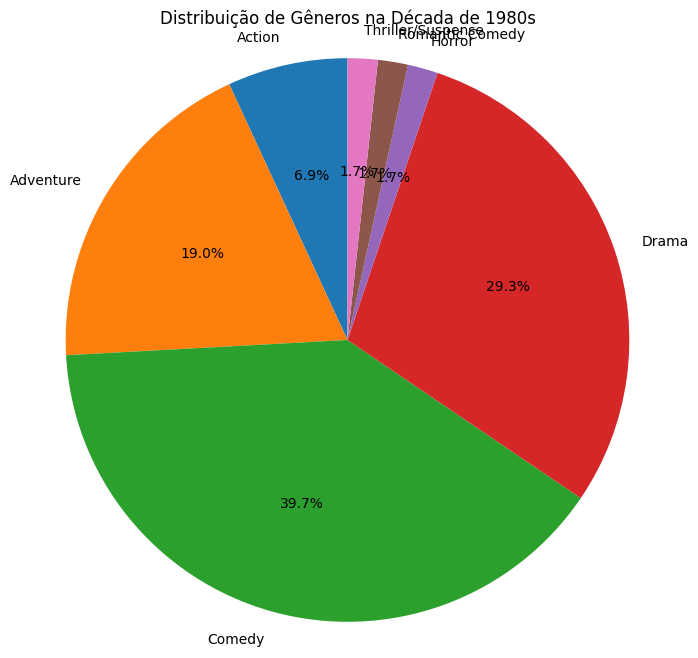

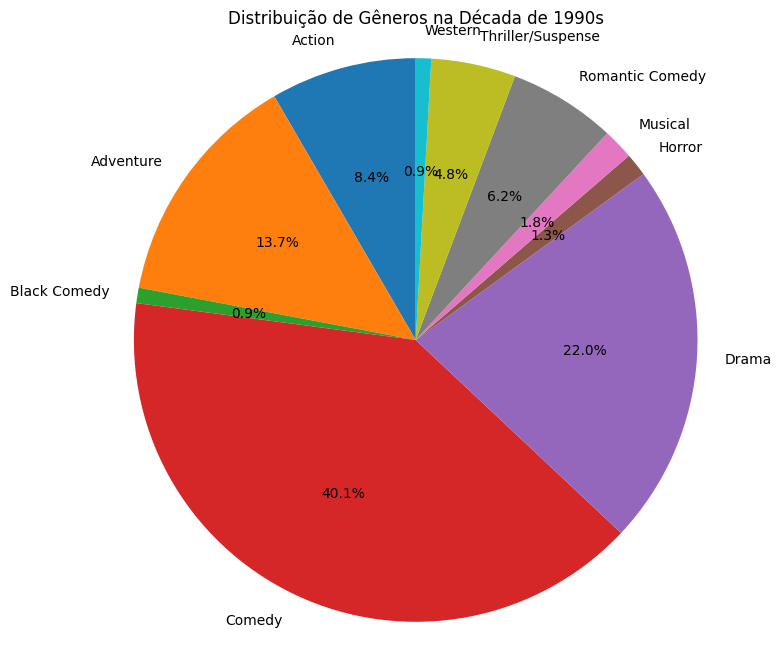

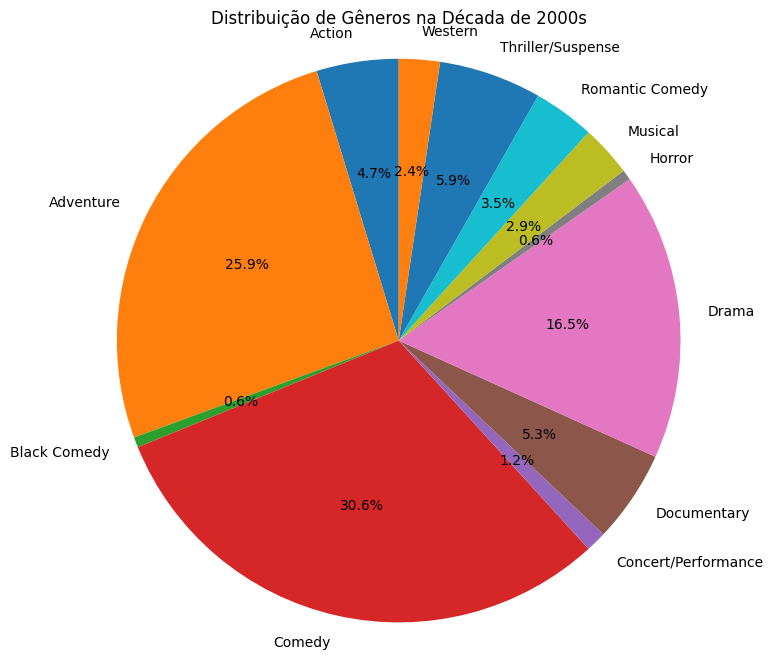

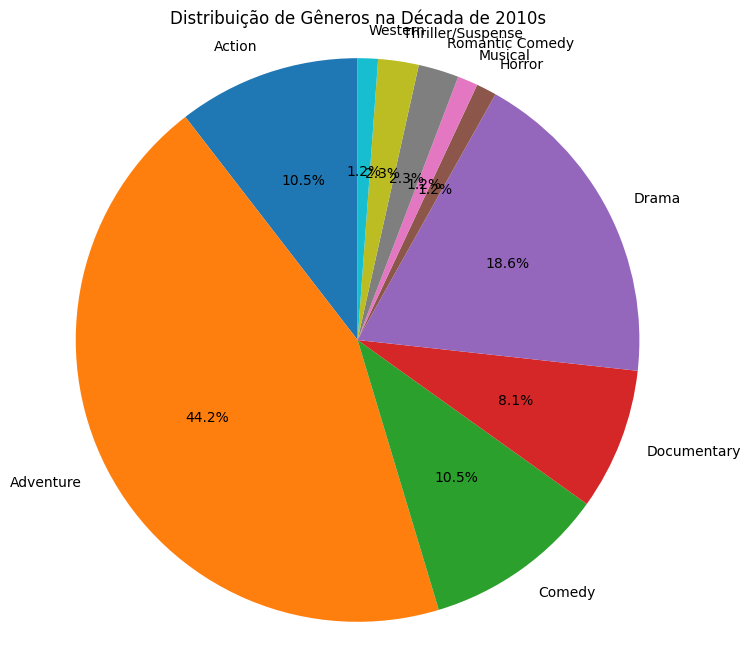

In [21]:
disney['release_date'] = pd.to_datetime(disney['release_date'], errors='coerce')

disney['decade'] = disney['release_date'].dt.year // 10 * 10

disney = disney.dropna(subset=['decade'])

genre_counts = disney.groupby(['decade', 'genre']).size().unstack(fill_value=0)

for decade in genre_counts.index:
    genre_percentages = genre_counts.loc[decade] / genre_counts.loc[decade].sum() * 100
    genre_percentages = genre_percentages[genre_percentages > 0]  # Excluir gêneros com 0% de participação
    plt.figure(figsize=(8, 8))
    plt.pie(genre_percentages, labels=genre_percentages.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribuição de Gêneros na Década de {decade}s')
    plt.show()

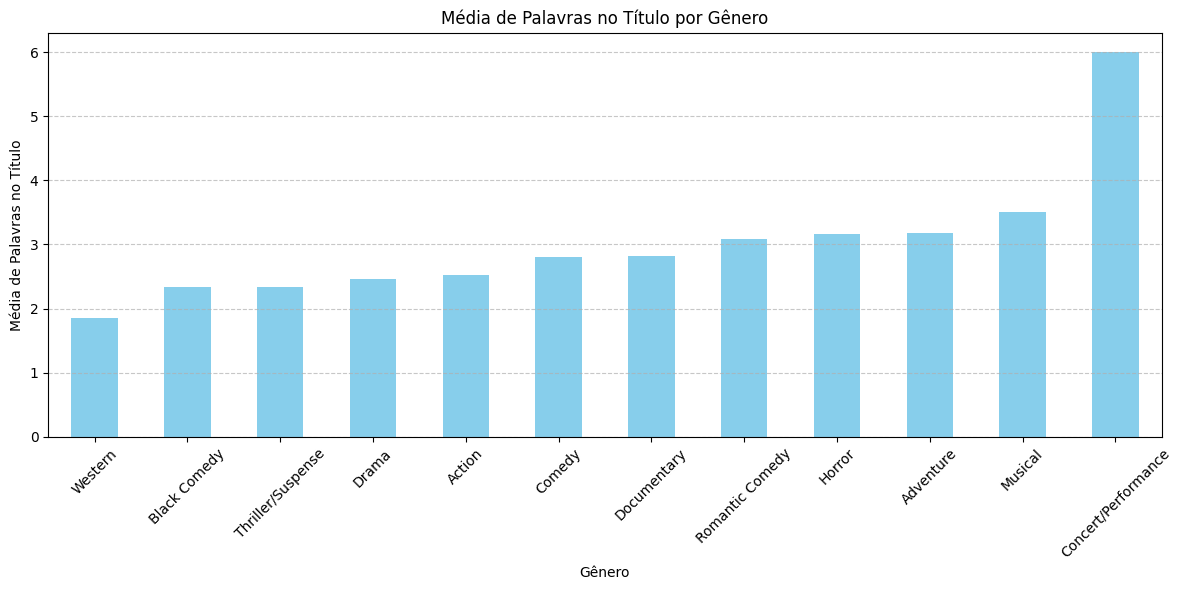

In [22]:
disney['title_word_count'] = disney['movie_title'].apply(lambda x: len(str(x).split()))

genre_word_count = disney.groupby('genre')['title_word_count'].mean().sort_values()

plt.figure(figsize=(12, 6))
genre_word_count.plot(kind='bar', color='skyblue')
plt.title('Média de Palavras no Título por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Palavras no Título')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

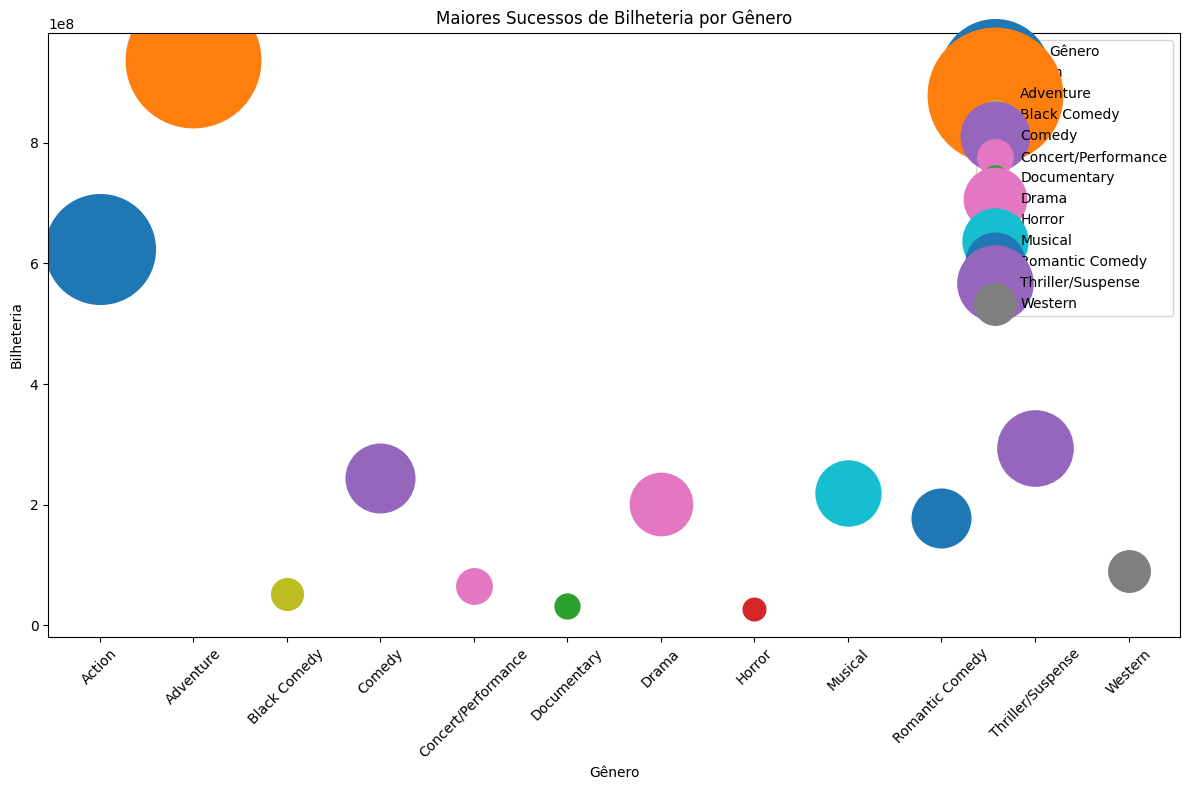

In [26]:
# Remover linhas com valores ausentes na coluna 'genre' ou 'total_gross'
disney_cleaned = disney.dropna(subset=['genre', 'total_gross'])

# Obter os maiores sucessos de cada gênero a partir dos maiores valores de "total_gross"
top_movies = disney_cleaned.groupby('genre').apply(lambda x: x.nlargest(1, 'total_gross')).reset_index(drop=True)

# Definir as cores para cada gênero
genre_colors = {
    'Action': 'tab:blue',
    'Adventure': 'tab:orange',
    'Documentary': 'tab:green',
    'Horror': 'tab:red',
    'Comedy': 'tab:purple',
    'Drama': 'tab:pink',
    'Musical': 'tab:cyan',
    'Romantic Comedy': 'tab:blue',
    'Thriller/Suspense': 'tab:purple',
    'Western': 'tab:gray',
    'Black Comedy': 'tab:olive',
    'Concert/Performance': 'tab:pink'
}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
for i, row in top_movies.iterrows():
    plt.scatter(row['genre'], row['total_gross'], s=row['total_gross']*0.00001, c=genre_colors[row['genre']], label=row['genre'])

# Adicionar legenda e rótulos
plt.legend(title='Gênero')
plt.title('Maiores Sucessos de Bilheteria por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Bilheteria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

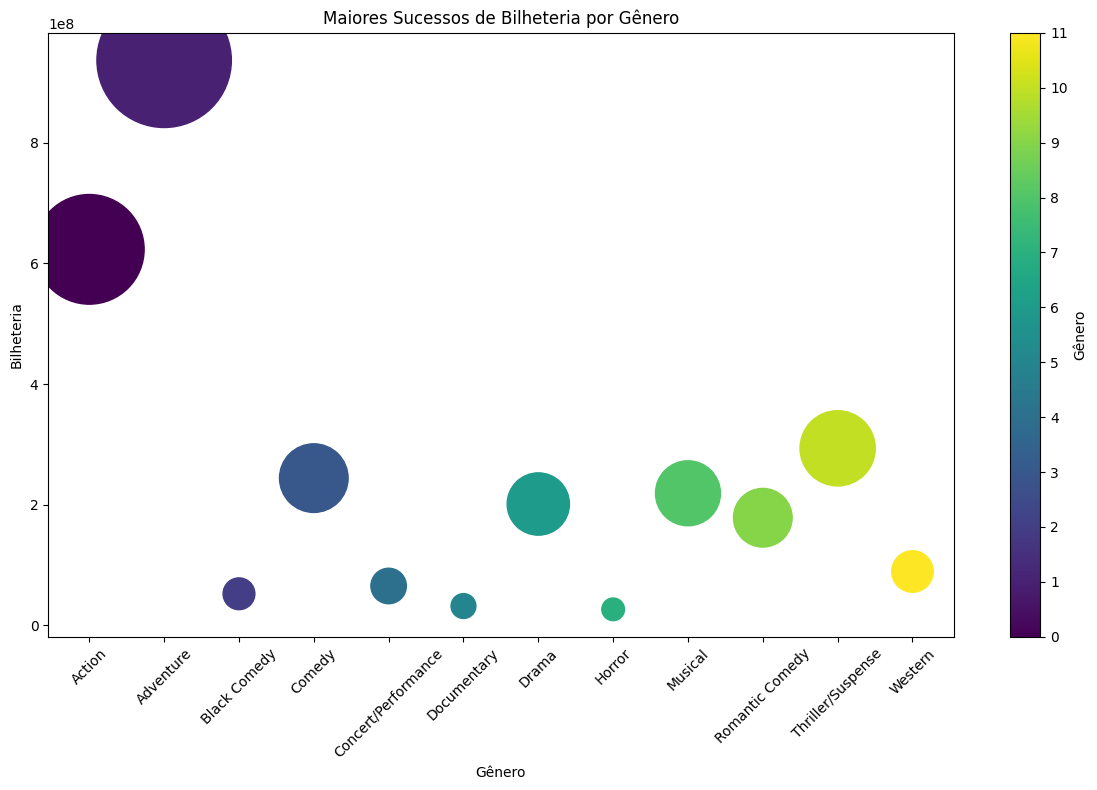

In [27]:
import seaborn as sns

# Remover linhas com valores ausentes na coluna 'genre' ou 'total_gross'
disney_cleaned = disney.dropna(subset=['genre', 'total_gross'])

# Obter os maiores sucessos de cada gênero a partir dos maiores valores de "total_gross"
top_movies = disney_cleaned.groupby('genre').apply(lambda x: x.nlargest(1, 'total_gross')).reset_index(drop=True)

# Mapear os gêneros para cores
genre_colors = sns.color_palette('viridis', n_colors=len(top_movies['genre'].unique()))

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter = plt.scatter(top_movies['genre'], top_movies['total_gross'], s=top_movies['total_gross']*0.00001, c=top_movies['genre'].astype('category').cat.codes, cmap='viridis')
plt.colorbar(scatter, ticks=range(len(top_movies['genre'].unique())), label='Gênero')
plt.title('Maiores Sucessos de Bilheteria por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Bilheteria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()